In [1]:
import os
from utils.config import PROJECT_DIR

os.chdir(PROJECT_DIR)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('data/task2/train.csv')
df.shape

(90000, 54)

count    90000.000000
mean        50.033981
std         28.897243
min          0.002634
25%         25.091903
50%         50.030705
75%         75.059454
max         99.999482
Name: target, dtype: float64

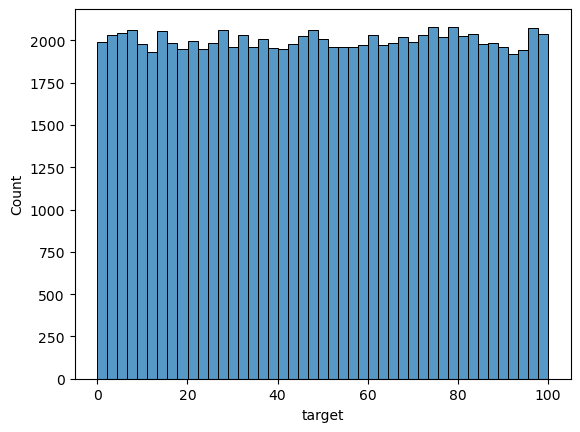

In [4]:
# seems like our Target has uniform distribution between 0 and 100
sns.histplot(df['target'])
display(df['target'].describe())

In [5]:
df.describe()
# features 0-5 seem to have the same statistics: mean about 250, values from 0 to 500
# feature 6 seem to be from -9 to 9, with mean = 0
# feature 7 seem to be from 0 to 1, with mean = 0.5
# feature 8 is categorical and have only 2 values: 0 and 1 with equal proportion
# features 9-12 seem to have same statistics as features 0-5
# features 13-52 seem to have same statistics: mean about 7.5, values from 0 to 15

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,249.818967,249.346778,249.899900,7.483940,7.498037,7.496259,7.501635,7.486463,7.523043,7.475585,7.494835,7.503939,7.507724,7.508681,7.472421,7.519205,7.515753,7.509402,7.496781,7.504014,7.494212,7.490808,7.486936,7.514508,7.491614,7.520193,7.507801,7.493713,7.513840,7.507033,7.479579,7.519826,7.502483,7.512965,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,144.363827,144.476128,144.310495,4.330908,4.318388,4.338732,4.345618,4.318031,4.323500,4.327327,4.325447,4.330159,4.332599,4.328966,4.345228,4.339104,4.333907,4.331007,4.334982,4.318553,4.327286,4.322672,4.329524,4.329973,4.333144,4.335244,4.329515,4.327480,4.333543,4.327670,4.326175,4.315565,4.333881,4.329929,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000095,0.000252,0.000190,0.000192,0.000067,0.000229,0.000125,0.000382,0.000398,0.000140,0.000382,0.000129,0.000192,0.000017,0.000080,0.000161,0.000437,0.000041,0.000070,0.000074,0.000111,0.000067,0.000078,0.000018,0.000094,0.000020,0.000106,0.000105,0.000273,0.000315,0.000060,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,126.000000,124.000000,125.000000,3.723392,3.763626,3.718755,3.719537,3.758746,3.778857,3.733780,3.748951,3.760261,3.742810,3.768145,3.685140,3.760790,3.746467,3.772795,3.741697,3.774239,3.743116,3.763061,3.750034,3.778028,3.743842,3.752848,3.776405,3.755325,3.754465,3.771945,3.731527,3.784809,3.763004,3.768044,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,250.000000,249.000000,251.000000,7.483265,7.505267,7.502682,7.515240,7.467721,7.539462,7.460267,7.481500,7.521563,7.520793,7.520739,7.484349,7.526894,7.528984,7.494876,7.491009,7.500083,7.514475,7.483334,7.458614,7.513794,7.475324,7.550623,7.484699,7.472789,7.518614,7.504101,7.452493,7.532363,7.511806,7.507058,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,375.000000,375.000000,375.000000,11.242883,11.228331,11.258049,11.284618,11.238904,11.254751,11.211187,11.238128,11.248749,11.244657,11.240915,11.239795,11.276738,11.272683,11.271486,11.257988,11.233189,11.223296,11.229486,11.245719,11.272623,11.241922,11.261178,11.255442,11.251097,11.270277,11.241504,11.222543,11.241135,11.255483,11.272459,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.00000

0


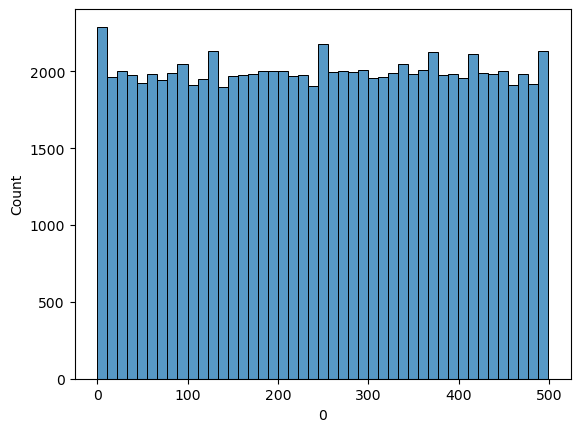

1


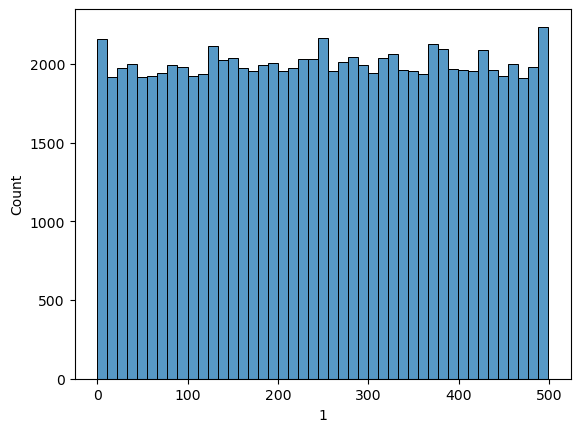

2


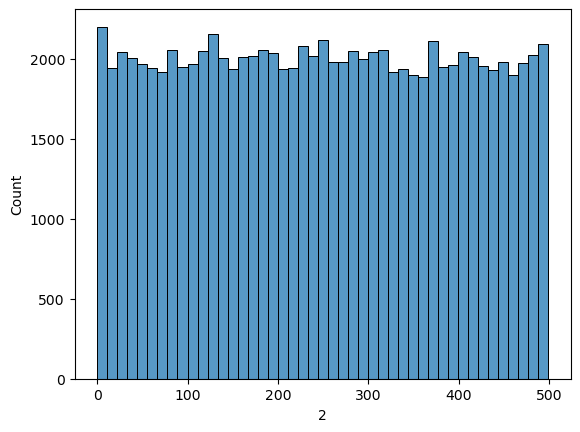

3


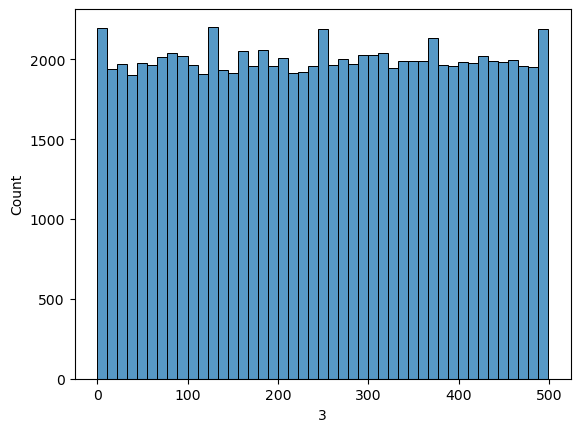

4


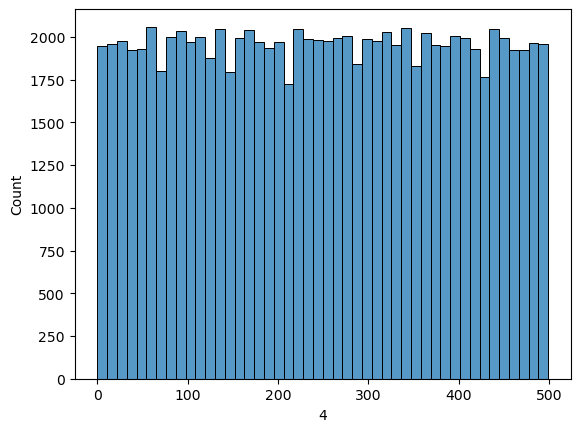

5


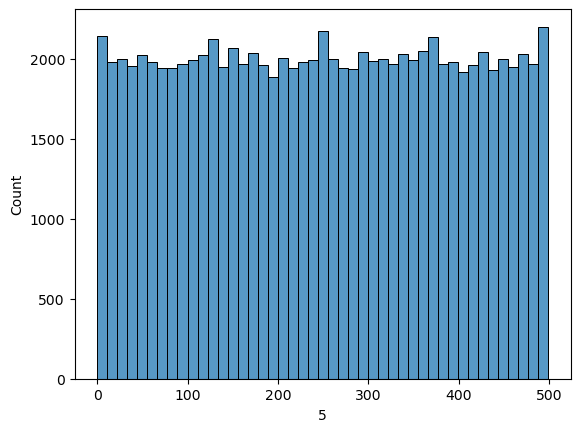

6


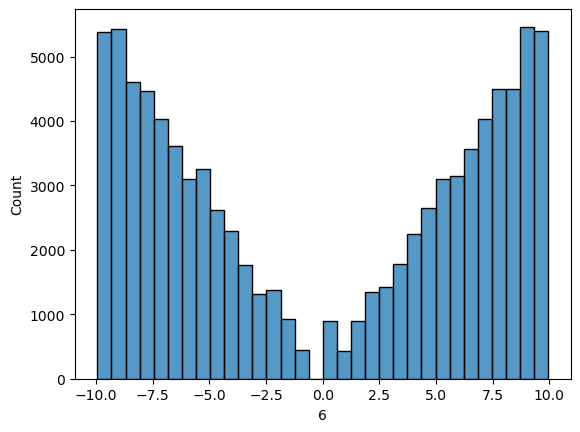

7


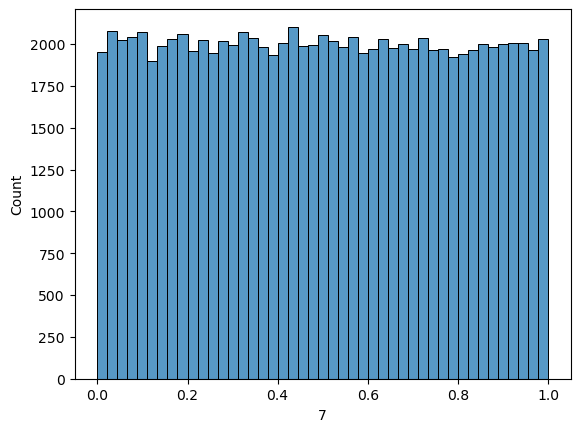

8


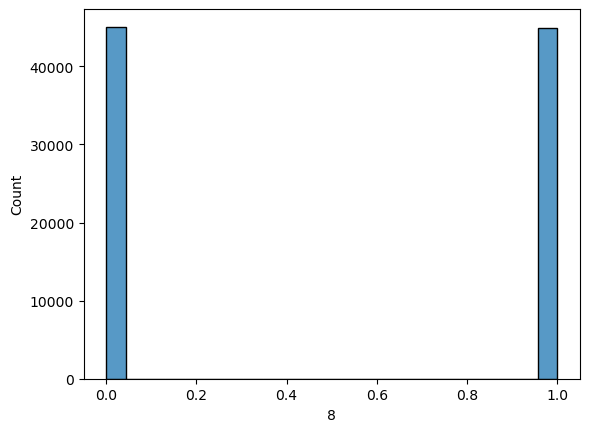

9


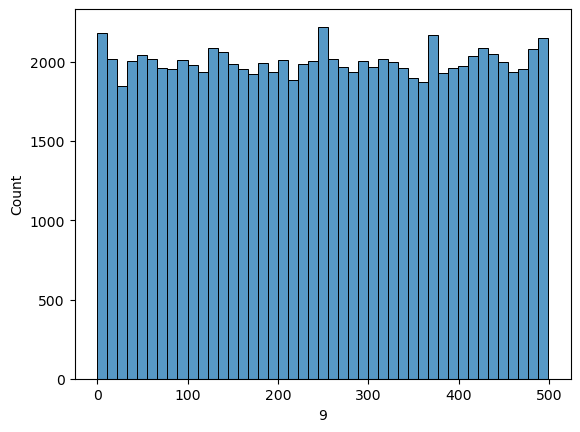

10


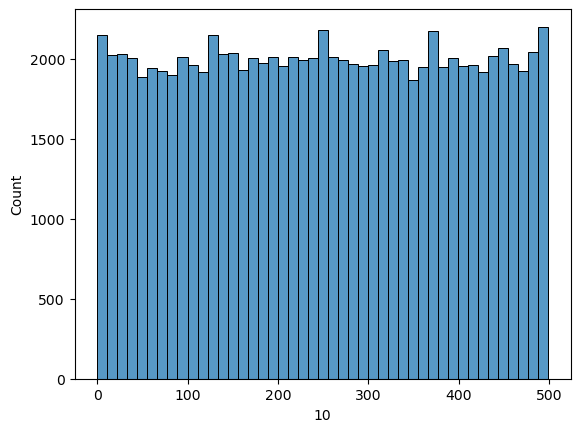

11


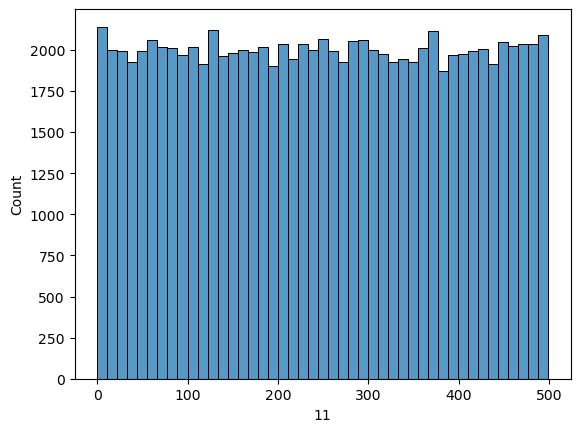

12


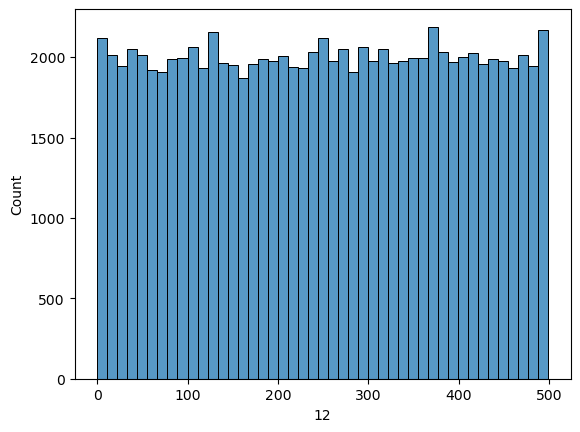

13


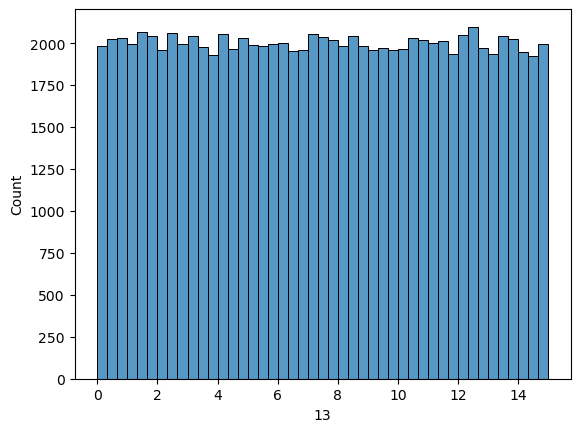

14


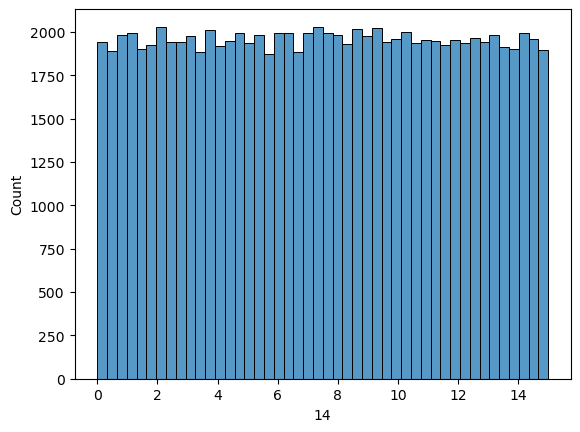

15


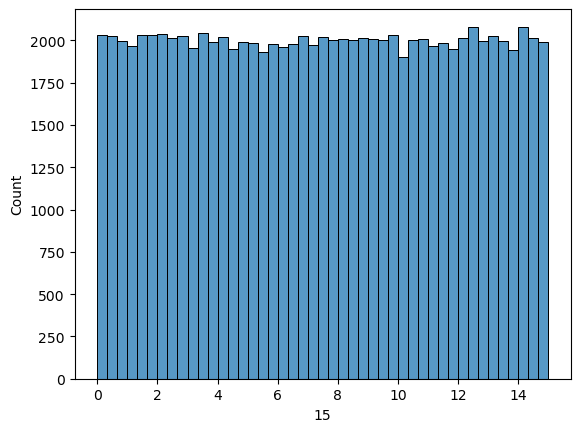

16


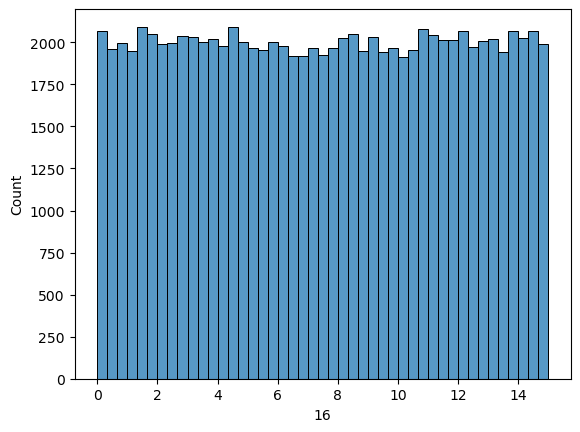

17


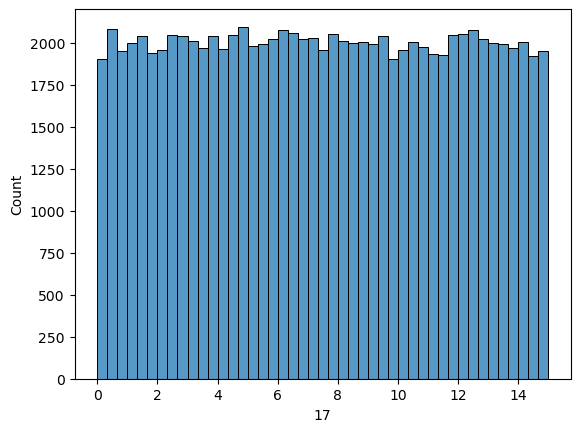

18


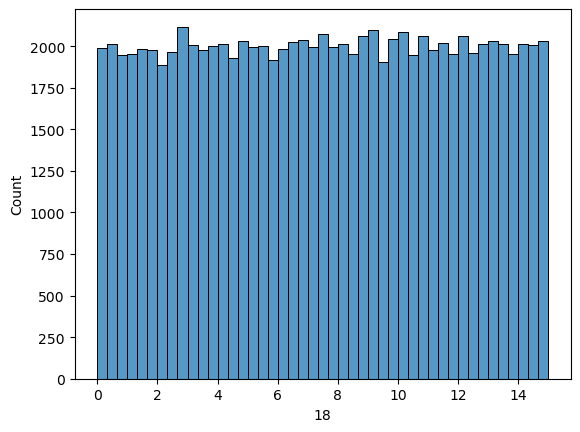

19


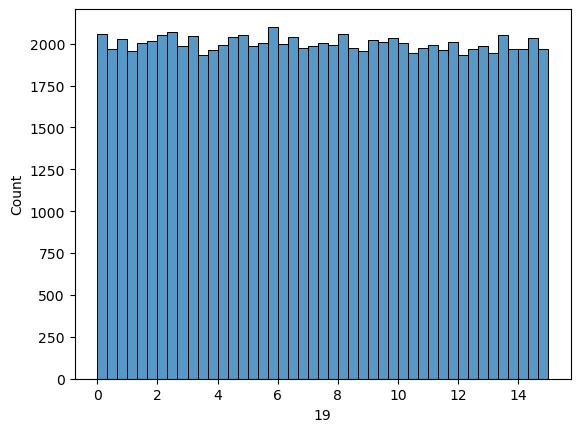

20


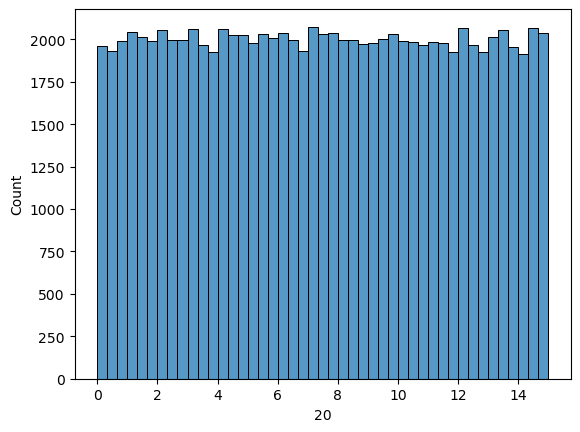

21


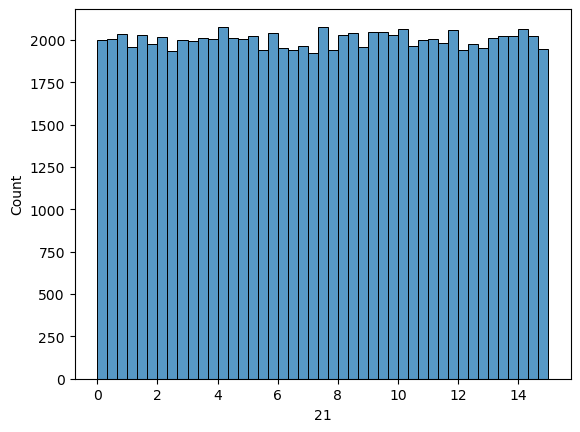

22


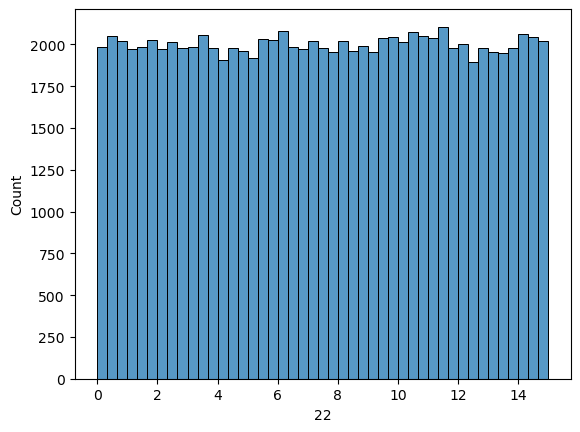

23


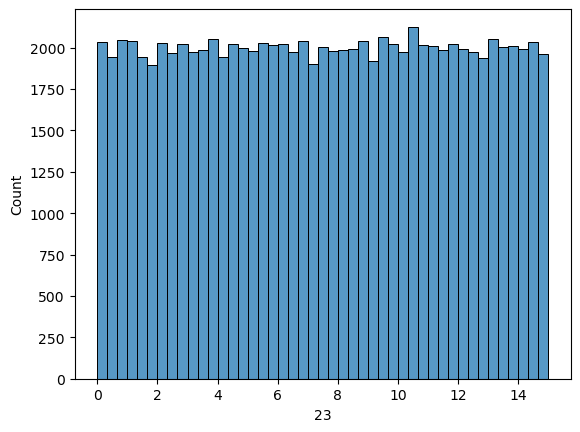

24


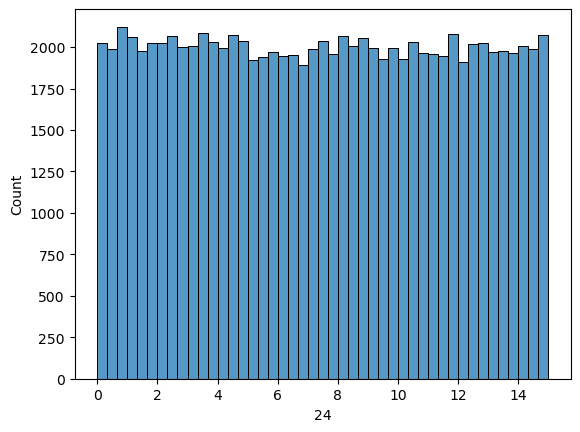

25


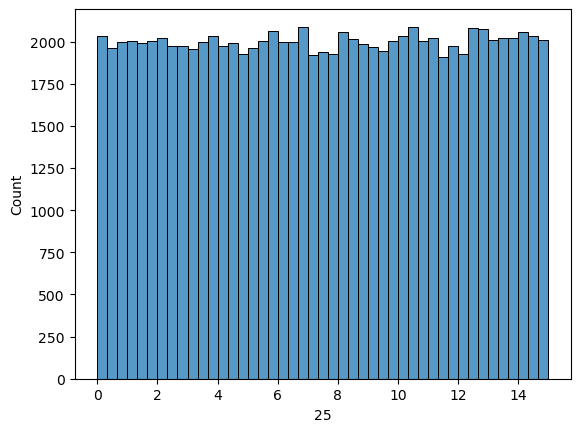

26


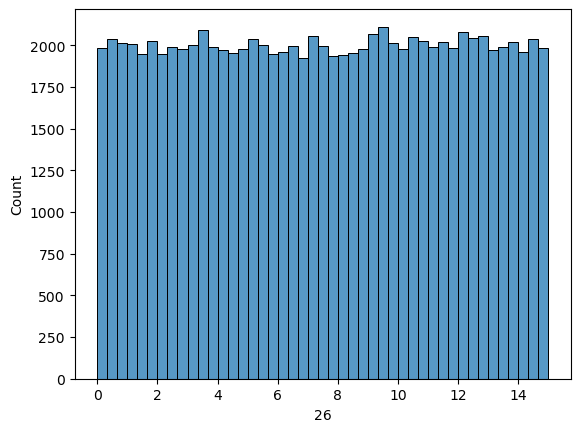

27


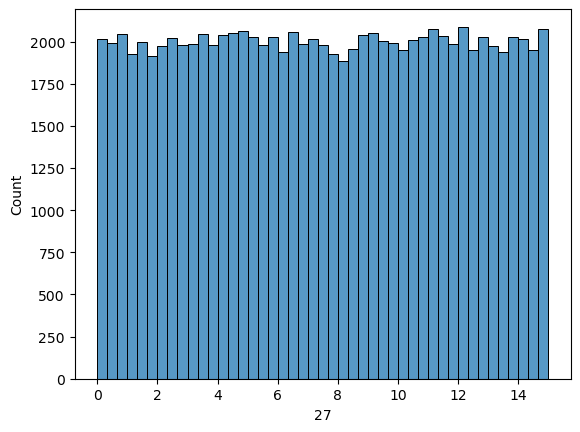

28


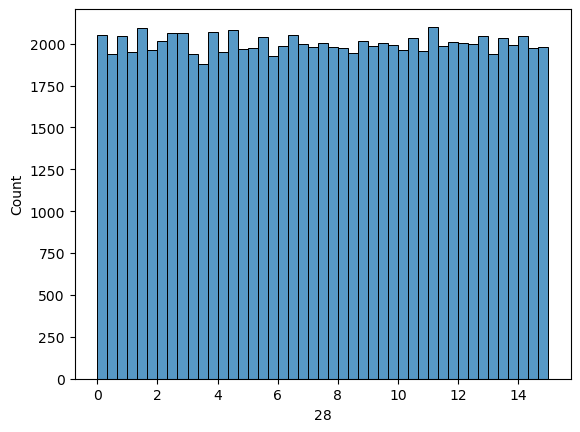

29


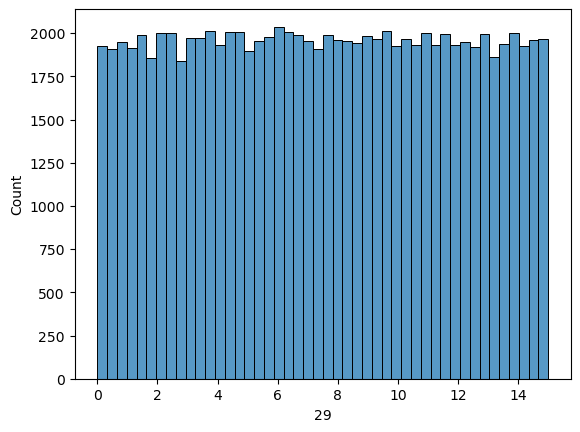

30


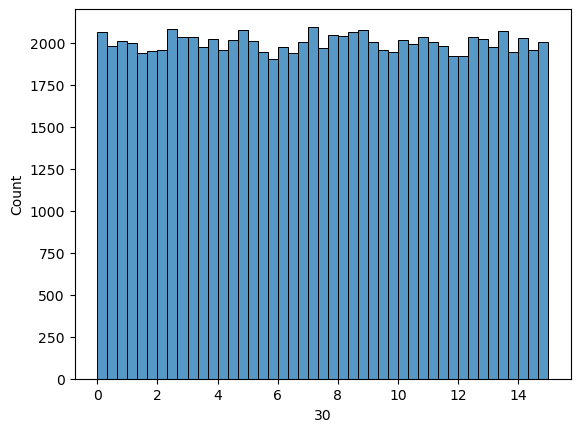

31


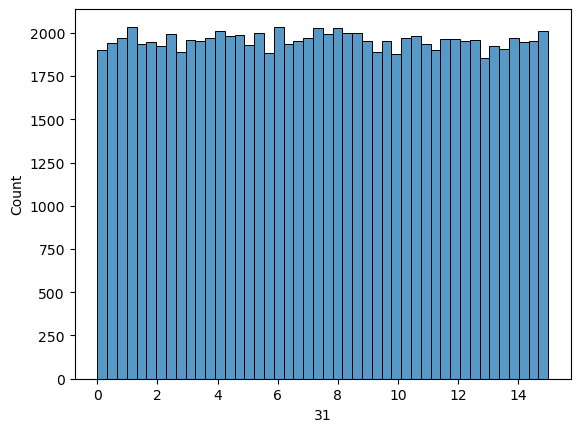

32


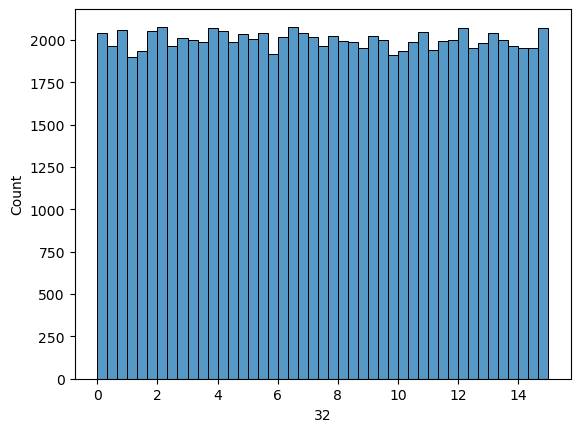

33


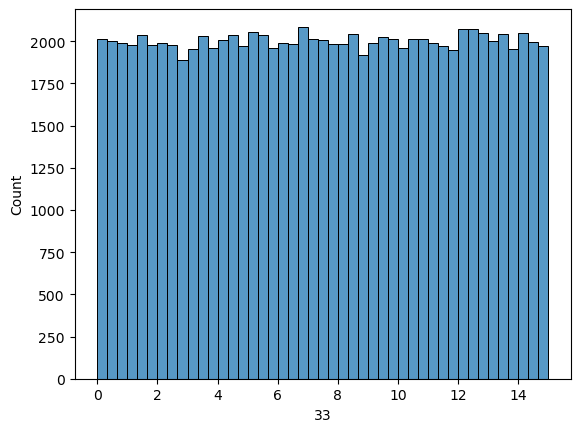

34


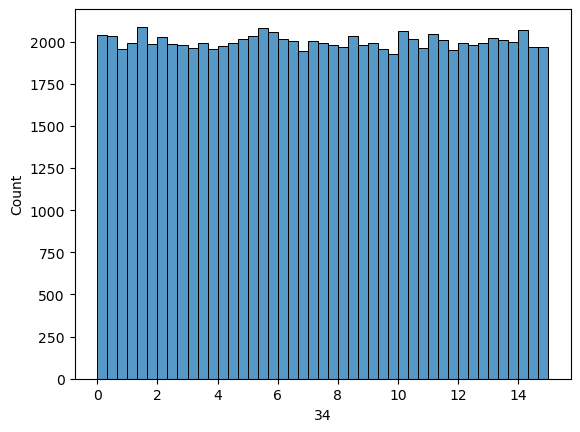

35


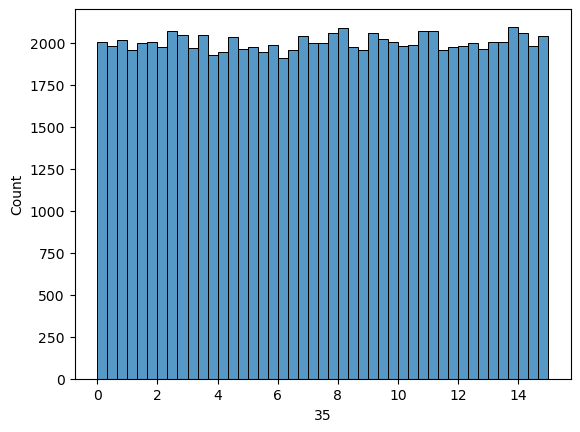

36


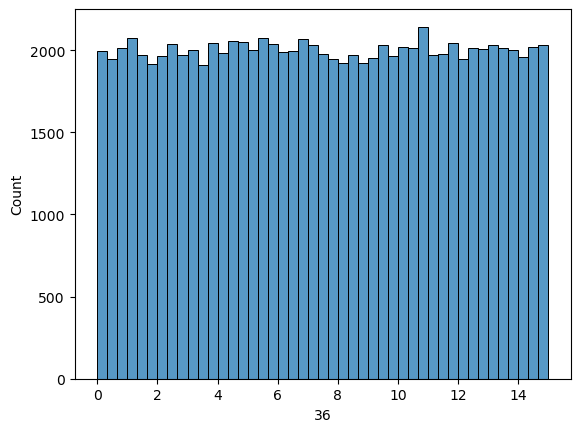

37


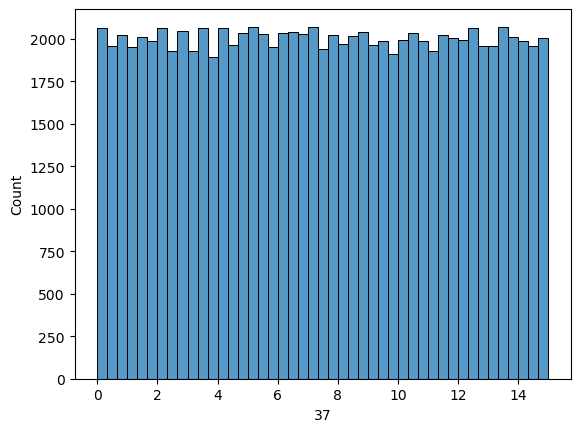

38


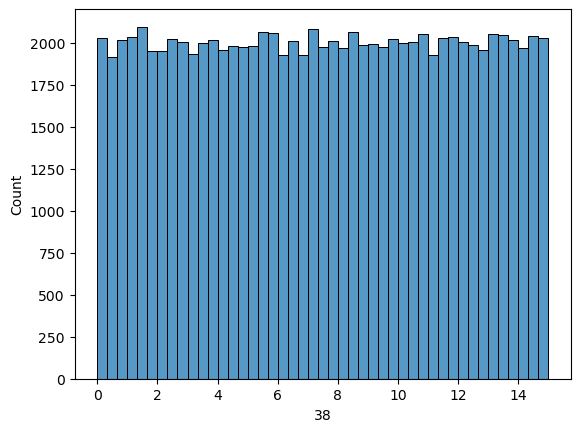

39


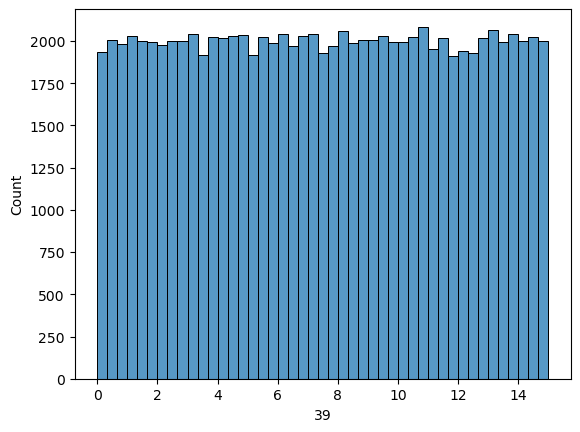

40


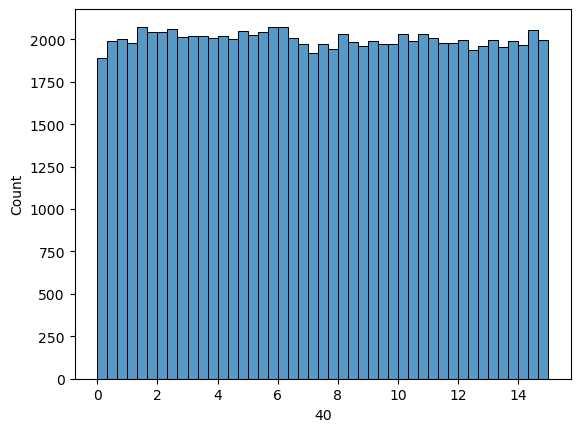

41


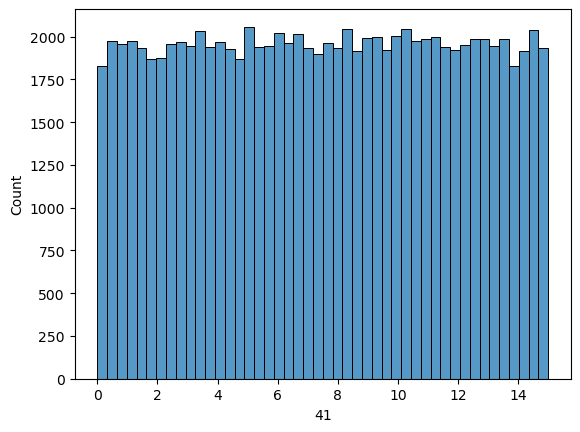

42


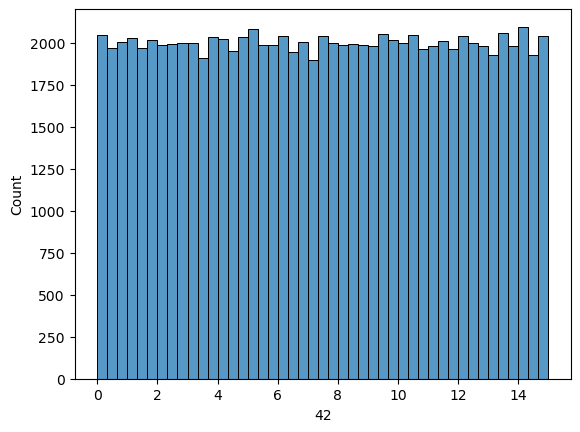

43


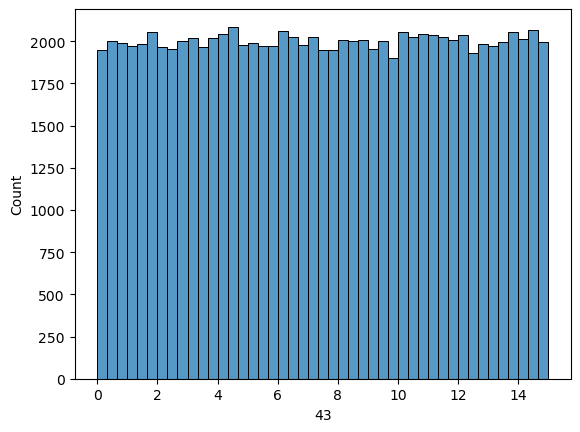

44


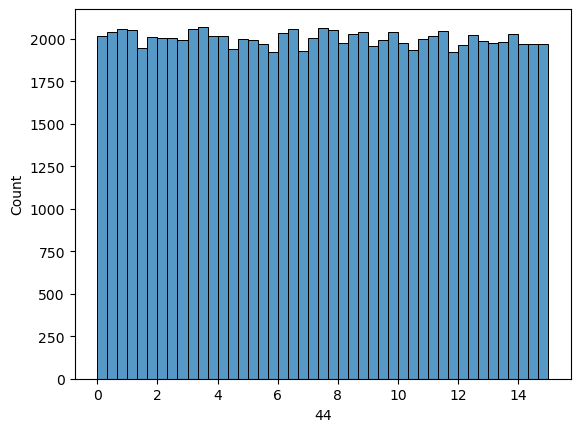

45


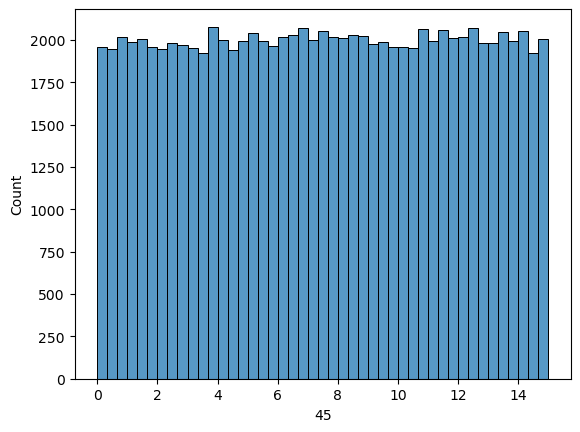

46


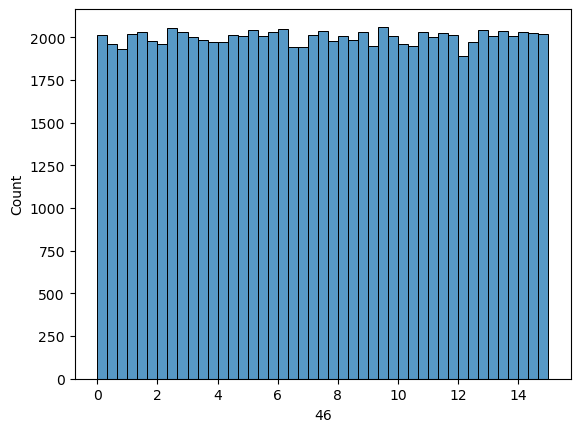

47


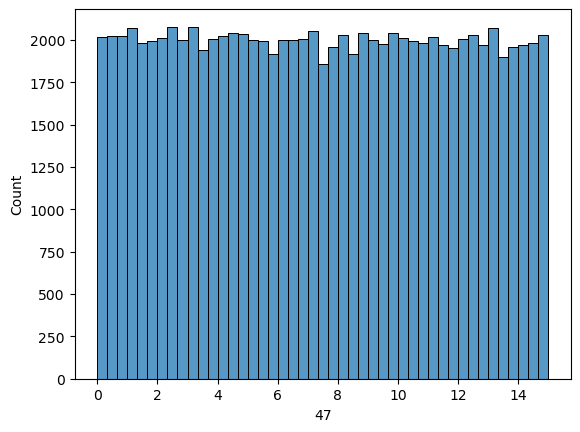

48


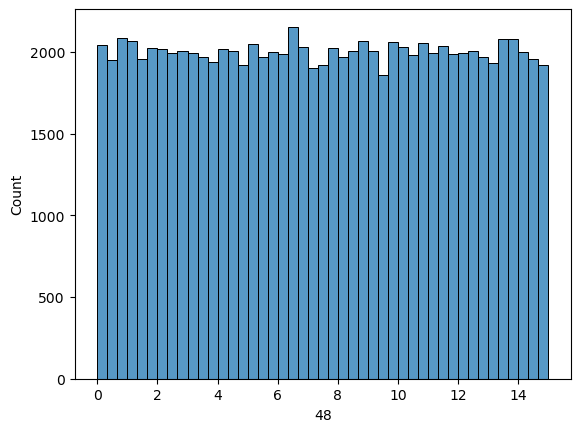

49


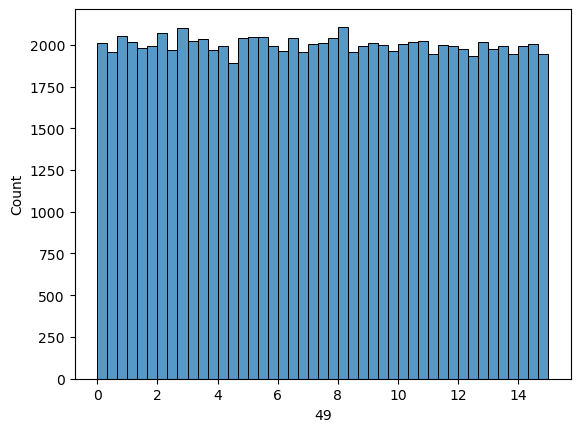

50


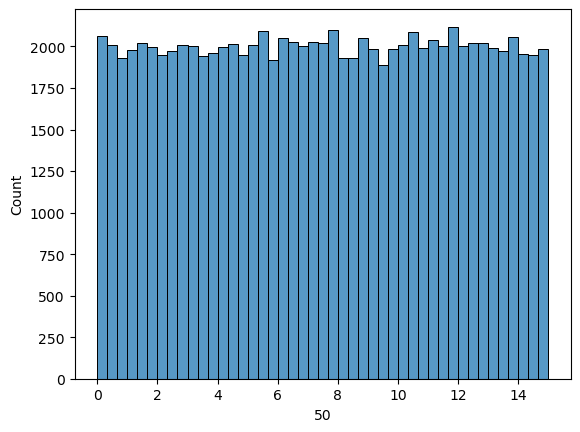

51


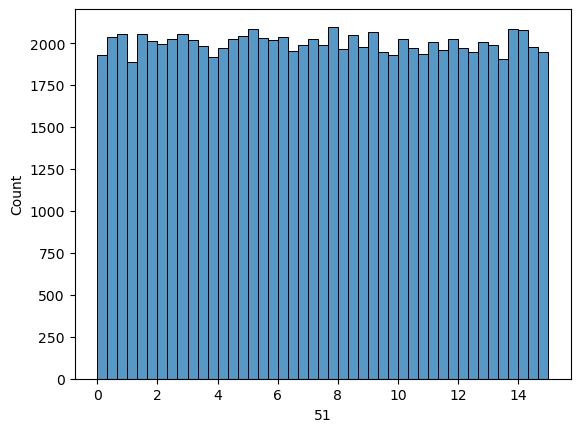

52


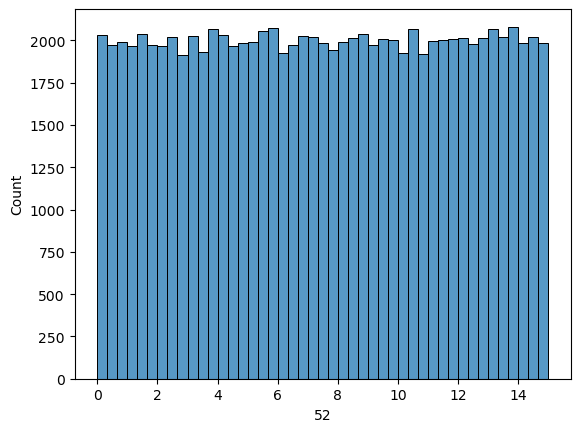

target


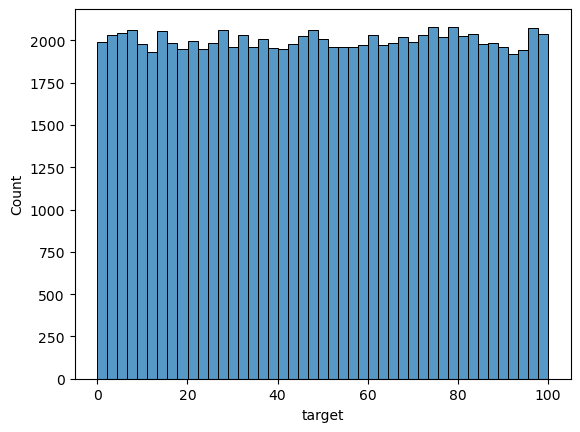

In [6]:
# look like all featuress (except feature 6, 8) have similar distribution 
for col in df.columns:
    print(col)
    sns.histplot(df[col])
    plt.show()

In [7]:
# turned out that feature 6 and 8 are highly correlated, while others aren't
corr = df.corr()
corr.style.background_gradient()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,1.000000,0.002009,0.001170,0.002957,-0.003764,-0.007362,0.007855,0.007174,0.008011,0.002339,0.000066,-0.001815,0.000896,-0.000404,-0.000075,-0.000253,0.002622,0.006260,0.000741,0.002210,-0.000895,-0.007855,-0.002258,0.004361,0.002187,-0.004042,0.005097,-0.003047,0.002541,-0.001587,-0.000414,0.006611,-0.002760,0.000027,0.008256,-0.004086,-0.004529,0.003246,0.000787,0.000185,-0.002930,0.003764,-0.000167,0.001234,-0.004142,-0.006525,0.003532,0.000310,-0.002639,0.004795,0.000287,-0.001647,-0.003612,0.002427
1,0.002009,1.000000,-0.001849,-0.004653,-0.002433,-0.002037,0.004181,0.005790,0.004095,0.002592,-0.002682,-0.000078,0.001109,-0.004103,-0.001656,-0.000614,0.002029,0.002349,0.001863,0.000461,0.000178,-0.001536,-0.003732,0.003922,-0.004662,0.003783,-0.003006,-0.001918,-0.002799,-0.004662,0.001058,-0.002409,0.005470,0.010357,-0.002004,-0.005055,-0.000449,-0.003830,0.002414,0.006489,-0.000481,-0.002569,0.007752,-0.002425,-0.002875,-0.002679,0.001402,-0.007900,-0.004497,0.002015,0.003119,0.006038,-0.003173,-0.005545
2,0.001170,-0.001849,1.000000,-0.000775,0.003082,-0.002161,0.002296,-0.000299,0.001983,0.005753,-0.002199,0.000317,0.005324,0.002116,0.008375,0.003951,-0.001875,-0.000639,0.001350,-0.000633,-0.000888,-0.001534,-0.000585,0.002231,0.000821,0.000266,-0.005920,0.002083,0.002801,-0.004899,0.001974,-0.002710,0.004933,-0.002065,0.005319,-0.000625,0.001144,0.003342,-0.001261,0.002653,-0.002015,0.002044,-0.002604,-0.001275,0.001092,-0.000588,0.000643,0.003106,0.001611,-0.001444,0.001006,-0.001753,0.002812,0.001003
3,0.002957,-0.004653,-0.000775,1.000000,-0.003623,-0.001038,0.000223,-0.004290,0.000966,0.000202,-0.004965,-0.000367,0.000916,0.000080,0.003102,0.001020,-0.007037,-0.005790,0.007506,0.001275,-0.002047,0.000044,0.004518,0.001132,0.002010,-0.006407,0.005319,-0.003369,-0.002658,-0.002173,0.001568,0.001985,0.003247,-0.003471,0.001715,-0.001856,0.001179,-0.004269,-0.003873,-0.004087,0.007568,0.004309,0.000720,0.000752,-0.005876,0.004777,0.001334,0.000528,0.006892,0.002790,0.002082,0.000373,0.002534,0.002807
4,-0.003764,-0.002433,0.003082,-0.003623,1.000000,-0.000992,0.005602,-0.004459,0.004763,-0.000778,-0.000388,0.001954,-0.001668,-0.000544,0.002047,0.000488,0.001208,0.001100,-0.001374,-0.000336,0.002304,0.001397,0.002999,0.001657,-0.008401,-0.002119,0.006148,-0.002811,0.000857,-0.002049,0.000079,0.003268,-0.005772,0.001476,0.001039,-0.000371,-0.006524,0.000780,-0.005631,0.002509,-0.008978,0.004317,-0.000019,-0.009656,-0.001413,0.006178,-0.000873,-0.002625,-0.001883,0.002884,-0.000702,0.001067,-0.002388,-0.001300
5,-0.007362,-0.002037,-0.002161,-0.001038,-0.000992,1.000000,-0.003869,-0.001455,-0.002289,0.004740,-0.003559,0.000507,-0.000037,-0.002532,0.000901,-0.001526,0.001329,0.000324,0.000658,-0.002281,-0.000124,0.000868,-0.001166,0.002663,0.005036,0.004169,0.005809,-0.000554,-0.004874,-0.001341,-0.000250,0.003361,0.006335,0.000679,-0.005939,0.005656,-0.000340,0.000682,0.000071,0.000860,0.004089,0.003336,-0.000008,-0.008769,-0.001160,-0.005226,-0.000776,-0.000087,-0.004682,0.000988,0.004735,-0.004100,0.004946,-0.002125
6,0.007855,0.004181,0.002296,0.000223,0.005602,-0.003869,1.000000,-0.002051,0.940016,-0.007185,0.001613,-0.000223,-0.002390,-0.003157,-0.005814,-0.000298,-0.004747,-0.000960,-0.000464,0.003840,0.006525,-0.002993,0.000800,0.003302,-0.001978,-0.002176,-0.003016,0.002847,-0.002015,-0.000106,0.002109,0.004690,0.006170,-0.005689,-0.006711,-0.003161,-0.003249,0.000200,0.001246,0.000057,-0.000819,0.002212,-0.003423,0.004318,0.000580,-0.000033,0.005084,-0.002972,-0.002300,0.003611,0.001542,-0.000944,0.002867,0.000666
7,0.007174,0.005790,-0.000299,-0.004290,-0.004459,-0.001455,-0.002051,1.000000,0.000779,-0.007187,-0.005711,0.005165,0.003281,-0.000094,0.006217,-0.006649,0.000764,0.001452,0.001051,0.004264,0.007655,0.001975,0.001593,-0.001765,0.001357,-0.00076

In [8]:
# so feature 6 is positive when feature 8 equals 1
df[df['6']>=0]['8'].value_counts(normalize=True)

1    0.99041
0    0.00959
Name: 8, dtype: float64

In [9]:
# when feature 6 = 0 (or feature 8 = 1), then our target is highly correlated with feature 7
# otherwise (feature 6 != 0) target is highly correlated with feature 6

# corr = df[df['6'] > 0].corr()
corr = df[df['6']==0].corr()
corr.style.background_gradient()

C:\Users\Maryia_Kazloutsava\Anaconda3\envs\quantum_env\lib\site-packages\pandas\io\formats\style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\Maryia_Kazloutsava\Anaconda3\envs\quantum_env\lib\site-packages\pandas\io\formats\style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,1.000000,0.039877,-0.003235,0.009811,-0.039621,-0.008121,nan,0.006205,-0.003402,0.012311,-0.021177,-0.019784,-0.031962,0.027339,-0.003236,0.024645,-0.012918,0.046983,-0.043751,0.036516,-0.023156,0.011746,0.022158,0.040269,-0.043555,-0.001114,0.046416,-0.000208,0.043132,-0.026349,0.023803,0.077449,0.038464,-0.059934,-0.084994,-0.007486,-0.015352,0.028513,0.035152,0.009790,-0.044481,0.031311,0.024168,0.063907,0.017193,0.027058,0.090619,-0.016110,-0.012640,0.043890,-0.000889,-0.045012,-0.005767,0.006205
1,0.039877,1.000000,-0.005043,-0.020529,0.033356,0.011347,nan,0.101512,0.024538,-0.021573,0.003479,0.037336,-0.009916,-0.035412,0.007846,-0.030866,0.067466,-0.037190,0.045986,0.008670,0.009649,0.039838,0.049000,0.010486,0.029709,0.046481,-0.041392,0.001078,-0.040947,0.009713,0.009792,0.039571,0.033169,0.000393,-0.043759,-0.077896,-0.010479,0.002604,0.000314,0.027470,0.012611,0.072995,-0.051946,0.006296,-0.014495,-0.006992,-0.045722,0.030417,-0.006531,0.021349,0.027862,0.019758,-0.034305,0.101512
2,-0.003235,-0.005043,1.000000,0.010488,-0.051756,-0.020698,nan,0.054120,-0.022229,-0.012359,-0.032174,0.022640,0.041083,-0.015098,0.033549,-0.002939,-0.075841,0.022448,0.003404,-0.022869,0.017855,0.044459,-0.036832,0.033681,0.009663,0.048933,0.024971,-0.006766,-0.004991,-0.031623,-0.011617,-0.031974,0.017651,-0.018624,0.023153,-0.015504,0.015734,-0.013729,0.010990,0.006972,-0.007075,0.053336,0.019740,0.003108,0.014893,0.025560,0.004235,0.018168,-0.002710,0.033716,0.020412,0.020707,-0.035606,0.054120
3,0.009811,-0.020529,0.010488,1.000000,-0.011981,0.029655,nan,0.026218,0.040007,-0.002342,0.028948,0.002170,0.044159,-0.005891,-0.008770,0.013896,0.008603,0.062695,-0.032565,-0.015773,0.002433,0.034487,0.049148,0.007256,0.001587,-0.046044,-0.017825,0.014347,0.016697,-0.024182,0.036610,-0.001024,0.041534,0.050041,-0.004034,0.060235,-0.009208,-0.010185,-0.010400,-0.026934,0.003898,0.015232,0.084760,-0.002818,-0.076013,-0.012323,-0.068765,-0.014991,-0.017956,-0.049431,0.001338,0.012259,-0.003321,0.026218
4,-0.039621,0.033356,-0.051756,-0.011981,1.000000,-0.031379,nan,0.056558,-0.002246,0.002728,-0.023360,0.008866,0.033169,0.003320,-0.043533,0.059879,-0.064415,-0.026221,0.030091,0.022503,0.009226,-0.024733,0.001448,-0.018635,-0.018591,-0.022973,-0.036154,0.025992,-0.023990,0.027390,0.040349,-0.014914,-0.034731,0.054457,-0.015008,0.008657,-0.001629,0.013374,-0.017731,0.002714,-0.031328,0.007127,-0.012867,0.041659,-0.029986,0.024539,0.047026,0.017988,-0.010033,-0.003716,-0.051071,-0.006401,-0.050974,0.056558
5,-0.008121,0.011347,-0.020698,0.029655,-0.031379,1.000000,nan,0.033712,0.023583,-0.014898,0.007880,-0.006823,-0.036235,-0.012220,-0.008821,-0.006751,0.030532,0.046091,-0.026907,0.018297,0.026106,-0.019715,-0.044085,0.002316,0.031843,-0.039412,0.014778,-0.007413,-0.066907,0.012383,0.008133,-0.024308,-0.035534,-0.015101,-0.004773,-0.019836,-0.030342,0.014127,0.050261,-0.030460,-0.027790,0.001866,-0.017954,-0.080778,-0.030910,0.025121,-0.005392,0.000053,0.002401,-0.030006,0.045688,0.024205,0.040814,0.033712
6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,0.006205,0.101512,0.054120,0.026218,0.056558,0.033712,nan,1.000000,0.097668,0.006618,-0.013213,0.069873,0.013334,-0.000434,0.001623,-0.006877,-0.064260,-0.027483,0.045030,-0.060960,0.002146,0.028831,-0.010637,-0.044789,0.035803,-0.007216,-0.066300,0.009221,0.058720,0.014061,0.014136,0.004582,-0.064162,0.044279,-0.018598,0.047785,0.009948,-0.013550,-0.047868,-0.028637,0.002553,0.036508,-0.071841,0.049328,-0.011874,0.023509,0.041739,0.032608,-0.015667,0.030914,-0.027648,0.006787,-0.038002,1.000000
8,-0.003402,0.024538,-0.022229,0.040007,-0.002246,0.023583,nan,0.097668,1.0000

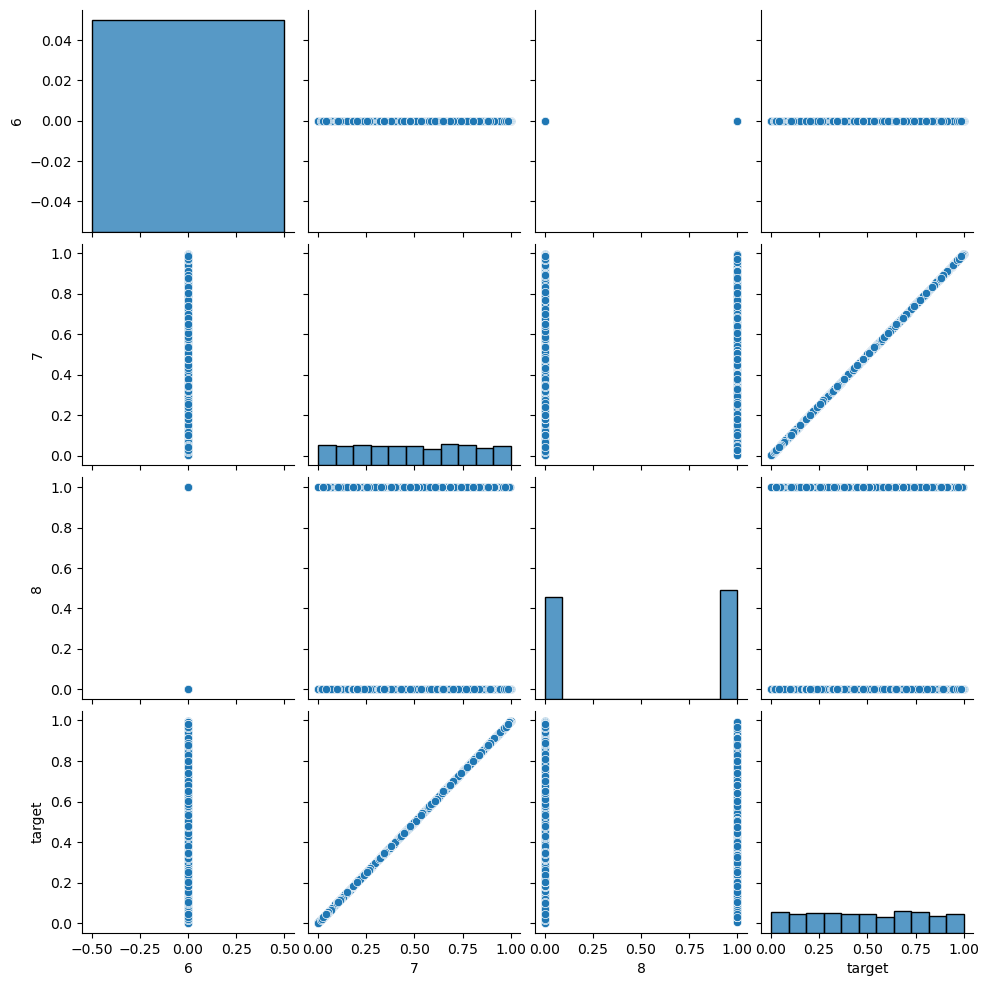

In [10]:
# perfect liniear pattern between target and feature 7, when feature 6 = 0
sns.pairplot(df[df['6']==0][['6', '7', '8', 'target']])

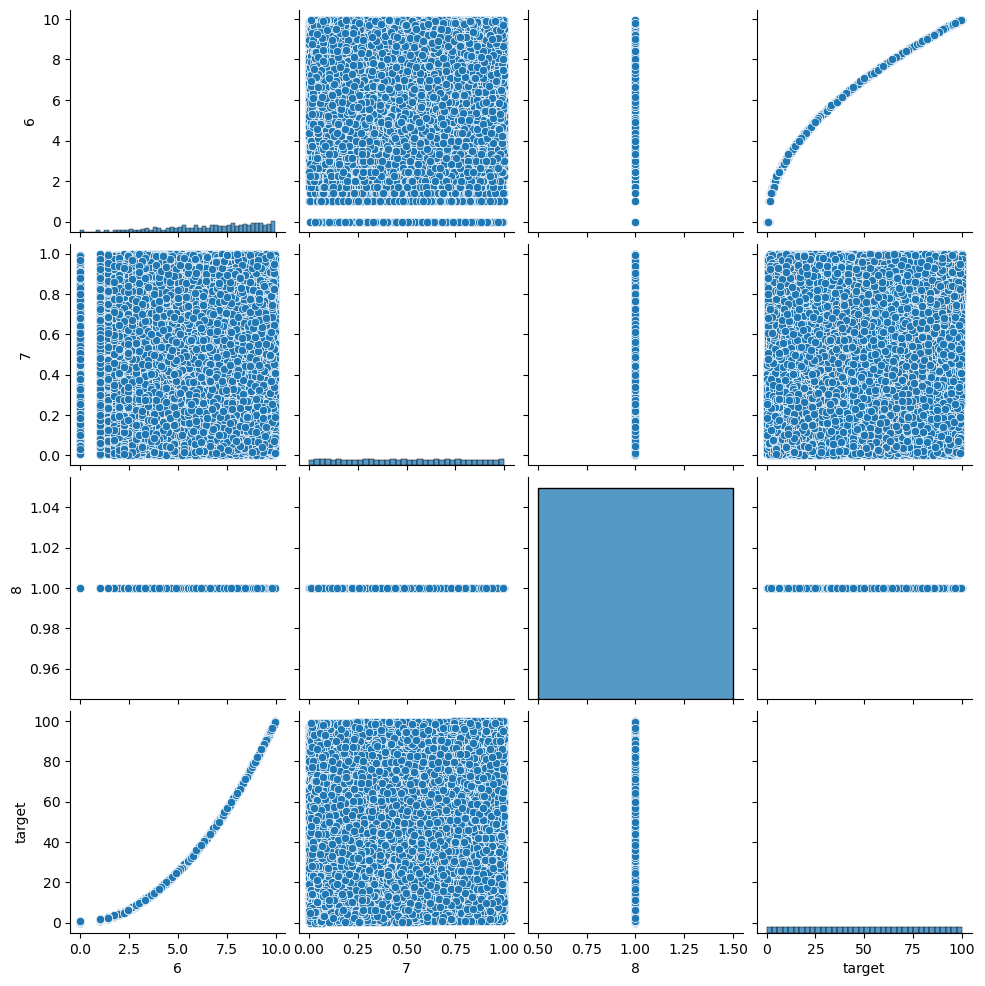

In [11]:
# looks like 'feature 8 == 1' has the same pattern with target as 'feature 6 > 0'
sns.pairplot(df[df['8'] == 1][['6', '7', '8', 'target']])

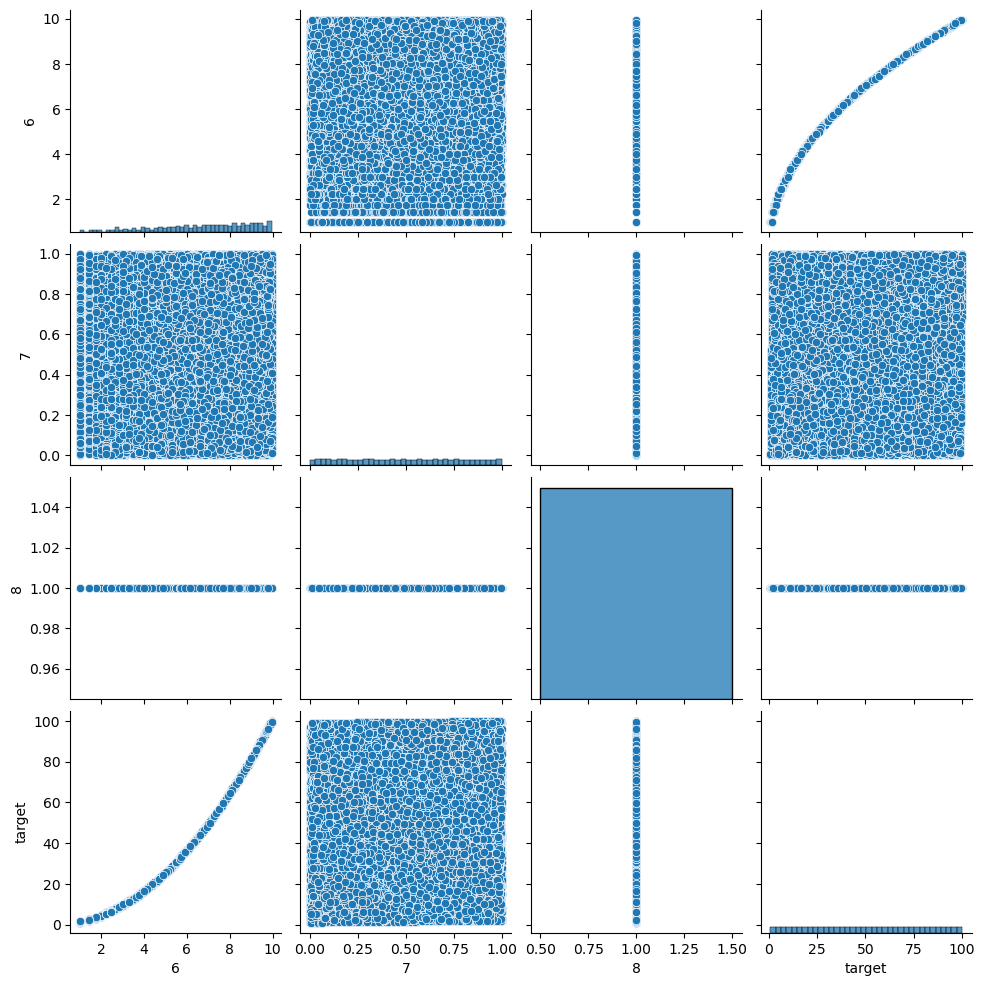

In [12]:
sns.pairplot(df[df['6']>0][['6', '7', '8', 'target']])

### Modelling

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

As we observed earlier correlations in some features, let's try different feature sets and see whether we have difference with full df. We have 53 features, it will take time to try all possible combinations or apply more 'inteligent' techniques so for this simple task I decided to select features which from my research somehow correlate with target

In [19]:
feature_sets = (df.columns.values[:-1], 
                ['0', '6', '7', '13'],
                ['0', '7', '8', '13'],
                ['6', '7'])

In [16]:
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

In [21]:
best_score = float('+inf')
best_model = None

for feature_set in feature_sets:
    print(feature_set)
    y = df['target']
    X = df[feature_set]

    # when it comes to data split, we don't know whether we're dealing with Time series data (where we can't split randomly)
    # or not, but df columns don't look like timestamps, so assume that our data isn't Time series
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    baseline_preds = y_train.mean()
    metric = rmse(y_test, baseline_preds)
    print(f'Baseline: {metric}')
    
    reg = LinearRegression().fit(X_train, y_train)
    y_preds = reg.predict(X_test)
    metric = rmse(y_test, y_preds)
    print(f'LinearRegression: {metric}')
    
    reg = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)
    y_preds = reg.predict(X_test)
    metric = rmse(y_test, y_preds)
    print(f'RandomForestRegressor (10 estimators): {metric}')
    
    reg = RandomForestRegressor(n_estimators=50).fit(X_train, y_train)
    y_preds = reg.predict(X_test)
    metric = rmse(y_test, y_preds)
    print(f'RandomForestRegressor (50 estimators): {metric}')

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52']
Baseline: 29.003836679630734
LinearRegression: 29.015412891101406
RandomForestRegressor (10 estimators): 0.005198292497137936
RandomForestRegressor (50 estimators): 0.004029134393612863
['0', '6', '7', '13']
Baseline: 29.003836679630734
LinearRegression: 29.000611325766968
RandomForestRegressor (10 estimators): 0.002855394809486736
RandomForestRegressor (50 estimators): 0.002359469845338681
['0', '7', '8', '13']
Baseline: 29.003836679630734
LinearRegression: 29.00055474909733
RandomForestRegressor (10 estimators): 31.34087444887497
RandomForestRegressor (50 estimators): 30.23415212446611
['6', '7']
Baseline: 29.003836679630734
LinearRegression: 29.00004019899879
RandomForestRegressor (10 estimators): 0.0017940120067009805
RandomFo

Looks like our model gets lowest RMSE with only 2 features: 6 and 7. There are more area to investigate: try cross-validation, feature selection, but will stop here for now.